library import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install util-gfsilveira

In [ ]:
import os #importando biblioteca de organização de arquivos
import joblib #convertendo imagens em valores numéricos .gz
import numpy as np #estruturação de dados
import matplotlib.pyplot as plt #plotagem de gráficos 
import matplotlib.image as mpimg #plotagem de imagens
# from util import meus_uteis, timeProcess
from PIL import Image
from util import meus_uteis, timeProcess
import pandas as pd

Organization of images in folders / 52 brightfield images of the 3T3 lineage are being saved

In [ ]:
novas_imagens = '/content/drive/MyDrive/imagens_3T3/Imagens_3T3_27_07_2021_Projeto_Ari_Ale' #diretório

img_key = 0 #Chave da primeira imagem

lista_novas_img = os.listdir(novas_imagens) #listando as figuras salvas no diretório
len(lista_novas_img) #quantidade de imagens

52

In [ ]:
# lista_novas_img

View images in 200x200 size

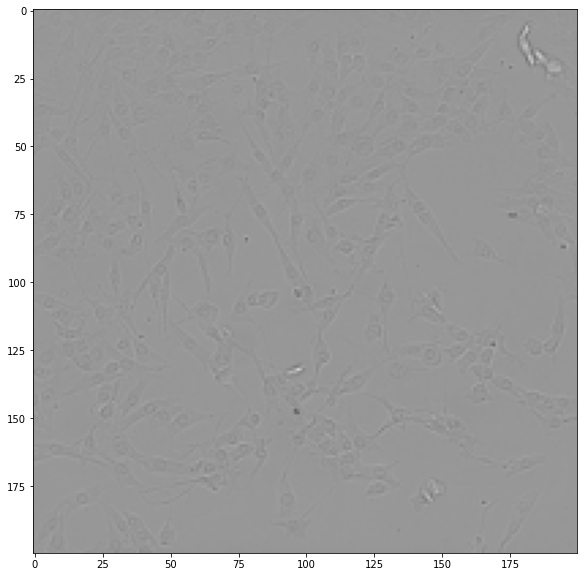

In [ ]:
#testando as imagens
resize_img = (200,200) #tamanho da imagem
image_test = novas_imagens +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

y = label (52)



In [ ]:
#Salvando os rótulos da imgem em uma lista
y_rotulo_imagem = [n.split('rot')[1] for n in lista_novas_img] #cortando informações da imagem
y_rotulo_imagem = [int(n.split('_')[0]) for n in y_rotulo_imagem]
y_rotulo_imagem = y_rotulo_imagem
len(y_rotulo_imagem) #verificando o numero de rótulos corresponde o numero de imagens

52

In [ ]:
# y_rotulo_imagem.sort()
# print(y_rotulo_imagem)

In [ ]:
# #dados estatísticos do conjunto de imagens
# df = pd.DataFrame(y_rotulo_imagem)
# df.describe()


Formatting all images that are saved in the directory into an array

In [ ]:
lista_imagens_camp_claro = [] #lista vazia onde vai ser armazenado os dados
for file in lista_novas_img:  #laço pra salvar todas as imagens
    image_test = novas_imagens +'/'+ file #qual caminho
    img = Image.open(image_test) #abrir a imagem
    img = img.resize(resize_img) #formatando em 200x200
    img = np.asarray(img)[:,:,:3] #formatando em array
    lista_imagens_camp_claro.append(img)  #adicionando cada imagem
np.asarray(lista_imagens_camp_claro).shape #verificando quantas imagens foram salvas em qual tamnho e camadas

(52, 200, 200, 3)

### y = label (104 - doubled)

In [ ]:
#dobrando o numero de rótulos - mesmo que a imagem esteja invertida, ela possui mesmo rótulo
y_rotulo_soma = y_rotulo_imagem + y_rotulo_imagem
len(y_rotulo_soma)

104

## Saving inverted images from left to right

In [ ]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(104, 200, 200, 3)

In [ ]:
# #conferindo a imagem
# plt.figure(figsize=(10,10))
# plt.imshow(lista_imagens_camp_claro[img_key + (44*1)])
# plt.show()

## Saving inverted images from bottom to top

Salvando mais 44 imagens invertendo a orientação.

### y = rótulo (132 - dobrou)

In [ ]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

156

In [ ]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(156, 200, 200, 3)

In [ ]:
# plt.figure(figsize=(10,10))
# plt.imshow(lista_imagens_camp_claro[img_key + (44*2)])
# plt.show()

### Salvando as imagens invertidas de cima pra baixo

### y = rótulo (284 - dobrou)

In [ ]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

208

In [ ]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)    
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(208, 200, 200, 3)

In [ ]:
# plt.figure(figsize=(10,10))
# plt.imshow(lista_imagens_camp_claro[img_key + (44*3)])
# plt.show()

In [ ]:
data = timeProcess()[1]
joblib.dump(np.asarray(lista_imagens_camp_claro), '/content/drive/MyDrive/1_Informações_scripts//lista_img_camp_clar_100_resized_regressao_3T3'+data+'.gz')

['/content/drive/MyDrive/1_Informações_scripts//lista_img_camp_clar_100_resized_regressao_3T32021-11-9.gz']

In [ ]:
joblib.dump(np.asarray(y_rotulo_soma), '/content/drive/MyDrive/1_Informações_scripts//lista_rotulo_camp_clar_100_resized_regressao_3T3'+data+'.gz')


['/content/drive/MyDrive/1_Informações_scripts//lista_rotulo_camp_clar_100_resized_regressao_3T32021-11-9.gz']

## Cropping 75% of the image/enlarging the image bank

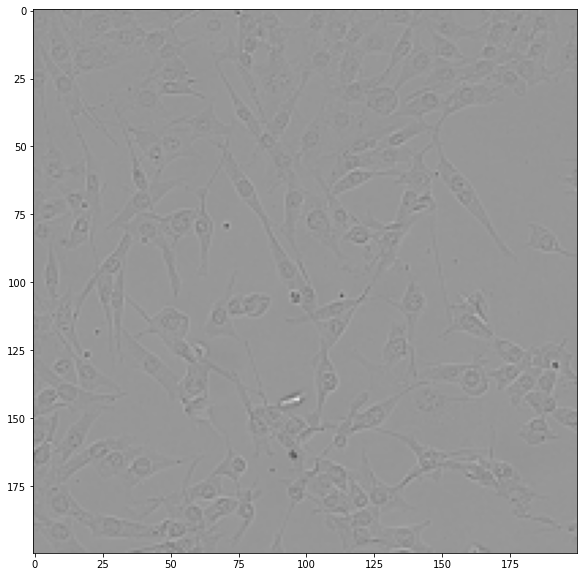

In [ ]:
box = (135,135,945,945)

image_test = novas_imagens +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.crop(box=box)
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [ ]:
from math import ceil

In [ ]:
y_rotulo_imagem = [n.split('rot')[1] for n in lista_novas_img]
y_rotulo_imagem = [int(n.split('_')[0]) for n in y_rotulo_imagem]
y_rotulo_imagem = [ceil(n-(n*0.25)) for n in y_rotulo_imagem]
len(y_rotulo_imagem)

52

In [ ]:
lista_imagens_camp_claro = []
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file #qual caminho
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(52, 200, 200, 3)

## crop images 75% resized and rotating from left to right

In [ ]:
y_rotulo_soma = y_rotulo_imagem + y_rotulo_imagem
len(y_rotulo_soma)

104

In [ ]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(104, 200, 200, 3)

## crop image 75% resized and flipping from bottom to top

In [ ]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

156

In [ ]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(156, 200, 200, 3)

## Saving crop 75% resized and flip top bottom image

In [ ]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

208

In [ ]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(208, 200, 200, 3)

In [ ]:
data = timeProcess()[1]
joblib.dump(np.asarray(lista_imagens_camp_claro), '/content/drive/MyDrive/1_Informações_scripts//lista_img_camp_clar_75_resized_regressao_3T3_'+data+'.gz')

['/content/drive/MyDrive/1_Informações_scripts//lista_img_camp_clar_75_resized_regressao_3T3_2021-11-9.gz']

In [ ]:
joblib.dump(np.asarray(y_rotulo_soma), '/content/drive/MyDrive/1_Informações_scripts//lista_rotulo_camp_clar_75_resized_regressao_3T3_'+data+'.gz')


['/content/drive/MyDrive/1_Informações_scripts//lista_rotulo_camp_clar_75_resized_regressao_3T3_2021-11-9.gz']

## 50% of the image

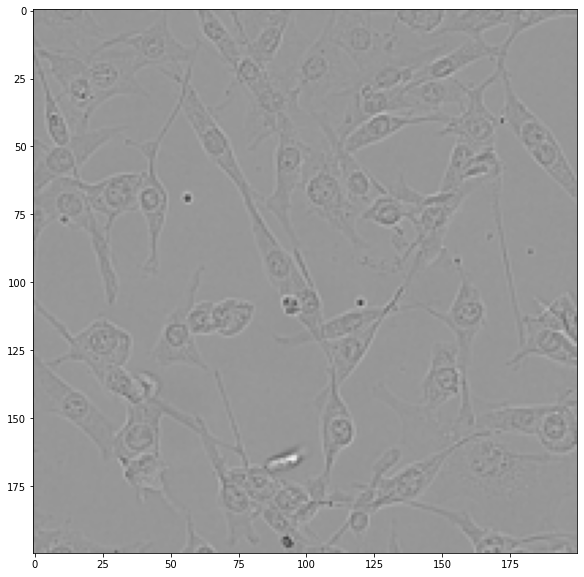

In [ ]:
box = (270,270,810,810)

image_test = novas_imagens +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.crop(box=box)
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [ ]:
y_rotulo_imagem = [n.split('rot')[1] for n in lista_novas_img]
y_rotulo_imagem = [int(n.split('_')[0]) for n in y_rotulo_imagem]
y_rotulo_imagem = [ceil(n/2) for n in y_rotulo_imagem]
len(y_rotulo_imagem)

52

In [ ]:
lista_imagens_camp_claro = []
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file #qual caminho
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(52, 200, 200, 3)

## saving crop 50% resized and turn image left right

In [ ]:
y_rotulo_soma = y_rotulo_imagem + y_rotulo_imagem
len(y_rotulo_soma)

104

In [ ]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(104, 200, 200, 3)

## Saving 50% resized crop and flip top bottom image

In [ ]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

156

In [ ]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(156, 200, 200, 3)

## Saving crop 50% resized and flip top bottom image

In [ ]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

208

In [ ]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(208, 200, 200, 3)

In [ ]:
data = timeProcess()[1]
joblib.dump(np.asarray(lista_imagens_camp_claro), '/content/drive/MyDrive/1_Informações_scripts//lista_img_camp_clar_50_resized_regressao_3T3_'+data+'.gz')

['/content/drive/MyDrive/1_Informações_scripts//lista_img_camp_clar_50_resized_regressao_3T3_2021-11-9.gz']

In [ ]:
joblib.dump(np.asarray(y_rotulo_soma), '/content/drive/MyDrive/1_Informações_scripts//lista_rotulo_camp_clar_50_resized_regressao_3T3_'+data+'.gz')


['/content/drive/MyDrive/1_Informações_scripts//lista_rotulo_camp_clar_50_resized_regressao_3T3_2021-11-9.gz']

## Crop 25% of the image

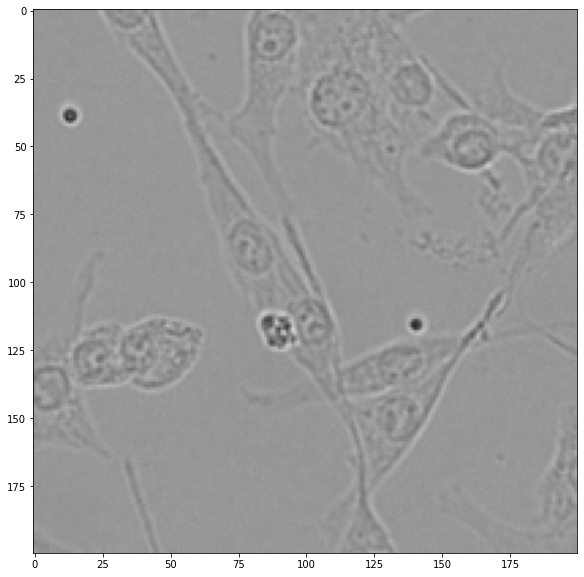

In [ ]:
box = (405,405,675,675)

image_test = novas_imagens +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.crop(box=box)
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [ ]:
y_rotulo_imagem = [n.split('rot')[1] for n in lista_novas_img]
y_rotulo_imagem = [int(n.split('_')[0]) for n in y_rotulo_imagem]
y_rotulo_imagem = [ceil(n-(n*0.75)) for n in y_rotulo_imagem]
len(y_rotulo_imagem)

52

In [ ]:
lista_imagens_camp_claro = []
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file #qual caminho
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(52, 200, 200, 3)

## Saving crop 25% resized and turn image left right

In [ ]:
y_rotulo_soma = y_rotulo_imagem + y_rotulo_imagem
len(y_rotulo_soma)

104

In [ ]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(104, 200, 200, 3)

## Saving crop 25% resized and flip top bottom image

In [ ]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

156

In [ ]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(156, 200, 200, 3)

## Saving crop 25% resized and flip top bottom image

In [ ]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

208

In [ ]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(208, 200, 200, 3)

In [ ]:
data = timeProcess()[1]
joblib.dump(np.asarray(lista_imagens_camp_claro), '/content/drive/MyDrive/1_Informações_scripts//lista_img_camp_clar_25_resized_regressao_3T3_'+data+'.gz')

['/content/drive/MyDrive/1_Informações_scripts//lista_img_camp_clar_25_resized_regressao_3T3_2021-11-9.gz']

In [ ]:
joblib.dump(np.asarray(y_rotulo_soma), '/content/drive/MyDrive/1_Informações_scripts//lista_rotulo_camp_clar_25_resized_regressao_3T3_'+data+'.gz')


['/content/drive/MyDrive/1_Informações_scripts//lista_rotulo_camp_clar_25_resized_regressao_3T3_2021-11-9.gz']

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c8daaa9d-6377-4e73-9571-1ae0cf7200fc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>